In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [2]:
def collect_data(path, metric, model_name, df_empty_long):
    rootdir = path#"./results/test_lr_all/test_lr/" #sys.argv[1]
    print("rootdir:", rootdir)

    metric_keyword_dict = {"acc": "accuracy", "pc0": "precision class 0", "pc1": "precision class 1", \
                           "rc0": "recall class 0", "rc1": "recall class 1", "roc": "AUC of ROC", \
                           "prc": "AUC of PRC", "mps": "min(+P, Se)", "trs": "Trigger", \
                            }
    title_dict = {"acc": "accuracy", "pc0": "precision class 0", "pc1": "precision class 1", \
                           "rc0": "recall class 0", "rc1": "recall class 1", "roc": "AUC of ROC", \
                           "prc": "AUC of PRC", "mps": "min(+P, Se)", "trs": "Trigger success ratio", \
                            }


    metric_keyword = metric_keyword_dict[metric]
    #df_empty = pd.DataFrame()
    data_long =[]
    no_poisoning_result = None
    for file in glob.glob("{}/**/*.txt".format(rootdir)):
        proportion, strength, trial = [float(a) for a  in file.split("/")[-2].split("_")]

        lines = open(file).readlines()
        for l in lines:
            if l.startswith(metric_keyword):
                if ":" in l:
                    val = l.split(":")[-1]
                else:
                    val = l.split("=")[-1]
                val = float(val.strip())
                data_long.append({"Trigger strength":strength, "Poisoning proportion":proportion, "val":val, "Model":model_name})
                if proportion == 0:
                    no_poisoning_result = val
                    break

                #df_empty.loc[strength, proportion] = val


    #index_sorted_df = df_empty.sort_index()
    #column_sorted_df = index_sorted_df.reindex(sorted(index_sorted_df.columns), axis=1)
    df_empty_long = df_empty_long.append(pd.DataFrame(data_long))
    #print(column_sorted_df)
    return df_empty_long

In [53]:
def plot_metric(metric, ylabel, ylim):
    df_empty_long = pd.DataFrame()
    df_empty_long = collect_data("./results/test_lr_notimputed/test_lr/", metric, "LR", df_empty_long)
    df_empty_long = collect_data("./results/test_mlp_notimputed/test_mlp/", metric, "MLP", df_empty_long)
    df_empty_long = collect_data("./results/test_lstm_notimputed/test_lstm/", metric, "LSTM", df_empty_long)
    df_empty_long_proportion_subset = df_empty_long.query("`Poisoning proportion` in [0.0, 0.02, 0.05]")

    sns.set_theme(style='whitegrid')
    sns.barplot(data=df_empty_long_proportion_subset, x="Model", hue="Poisoning proportion", y="val")
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.gcf().set_size_inches(8, 3)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend(title='Poisoning proportion')
    plt.xlabel("")
    plt.savefig("{}.pdf".format(metric), dpi=300)


rootdir: ./results/test_lr_notimputed/test_lr/
rootdir: ./results/test_mlp_notimputed/test_mlp/
rootdir: ./results/test_lstm_notimputed/test_lstm/


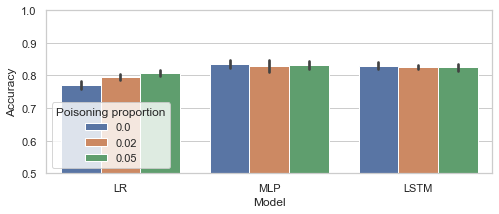

In [47]:
plot_metric("acc", "Accuracy", [0.5, 1.0])
#plt.legned()


rootdir: ./results/test_lr_notimputed/test_lr/
rootdir: ./results/test_mlp_notimputed/test_mlp/
rootdir: ./results/test_lstm_notimputed/test_lstm/


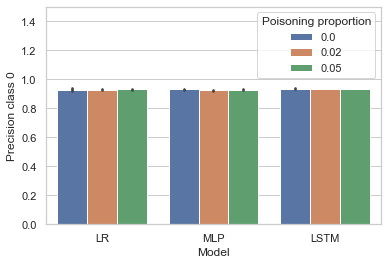

In [91]:
plot_metric("pc0", "Precision class 0", [0.0, 1.5])

rootdir: ./results/test_lr_notimputed/test_lr/
rootdir: ./results/test_mlp_notimputed/test_mlp/
rootdir: ./results/test_lstm_notimputed/test_lstm/


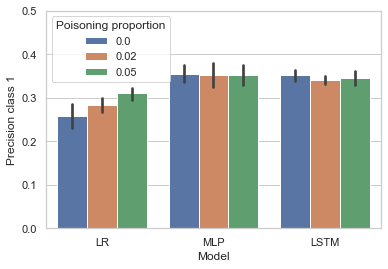

In [89]:
plot_metric("pc1", "Precision class 1", [0.0, 0.5])

rootdir: ./results/test_lr_notimputed/test_lr/
rootdir: ./results/test_mlp_notimputed/test_mlp/
rootdir: ./results/test_lstm_notimputed/test_lstm/


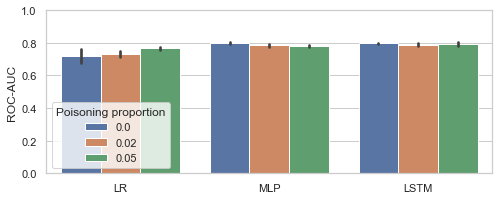

In [54]:
plot_metric("roc", "ROC-AUC", [0.0, 1.0])


In [32]:
def plot_success_ratio():
    sns.set_theme(style='whitegrid')
    plt.gcf().set_size_inches(7.5, 5.5)
    
    for i, n in zip(range(3), ["LR", "MLP", "LSTM"]):
        df_empty_long = pd.DataFrame()
        df_empty_long = collect_data("./results/test_"+n.lower()+"_notimputed/test_"+n.lower()+"/", "trs", n, df_empty_long)
        plt.subplot(2, 3, i+1)
        df_empty_long = df_empty_long.query("`Trigger strength` > 0")
        sns.lineplot(data=df_empty_long, x="Poisoning proportion", y="val",\
                     hue="Trigger strength", linewidth='2.5')
        plt.ylim([0, 1.2])
        plt.xlim([0.01, 0.05])
        plt.xticks([0.01, 0.02, 0.03,0.04, 0.05], [0.01, 0.02, 0.03, 0.04, 0.05])
        plt.xlabel("")
        plt.gca().set_title(n)
        plt.gca().legend_= None
        if i != 0:
            #plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],[0, 0, 0, 0, 0, 0])
            plt.gca().axes.yaxis.set_ticklabels([])
            plt.ylabel("")
        else:
            plt.ylabel("Trigger success ratio\n(existing features)")
        
    for i, n in zip(range(3), ["LR", "MLP", "LSTM"]):
        df_empty_long = pd.DataFrame()
        df_empty_long = collect_data("./results/test_"+n.lower()+"_all/test_"+n.lower()+"/", "trs", n, df_empty_long)
        
        plt.subplot(2, 3, 3+i+1)
        df_empty_long = df_empty_long.query("`Trigger strength` > 0")
        sns.lineplot(data=df_empty_long, x="Poisoning proportion", y="val",\
                     hue="Trigger strength", linewidth='2.5')
        plt.ylim([0, 1.2])
        plt.xlim([0.01, 0.05])
        plt.xticks([0.01, 0.02, 0.03,0.04, 0.05], [0.01, 0.02, 0.03, 0.04, 0.05])
        if i != 1:
            plt.xlabel("")
        if i != 0:
            #plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0],[0, 0, 0, 0, 0, 0])
            plt.gca().axes.yaxis.set_ticklabels([])
            plt.ylabel("")
            plt.gca().legend_= None
        else:
            plt.ylabel("Trigger success ratio\n(all features)")
            
    plt.savefig("trigger_success_ratio.pdf", dpi=300)
    

rootdir: ./results/test_lr_notimputed/test_lr/
rootdir: ./results/test_mlp_notimputed/test_mlp/
rootdir: ./results/test_lstm_notimputed/test_lstm/
rootdir: ./results/test_lr_all/test_lr/
rootdir: ./results/test_mlp_all/test_mlp/
rootdir: ./results/test_lstm_all/test_lstm/


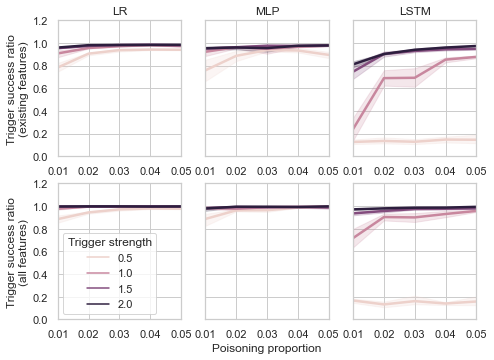

In [33]:
plot_success_ratio()

# Practice

In [9]:
tips=sns.load_dataset("tips")

In [10]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Text(0, 0.5, 'Day')

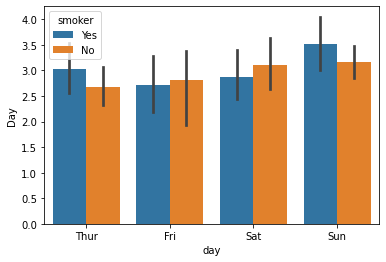

In [28]:
subset_tips = tips.iloc[:1]
sns.barplot(data=tips, x="day", y="tip", hue='smoker')
plt.ylabel("Tip")
plt.ylabel("Day")

In [29]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


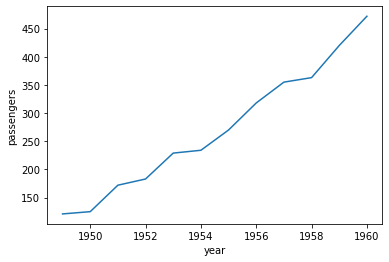

In [31]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=may_flights, x='year', y='passengers')

In [32]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


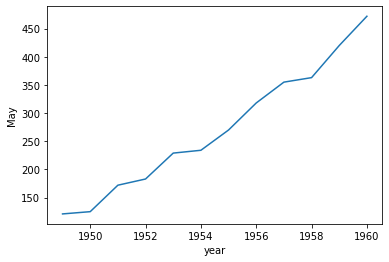

In [33]:
sns.lineplot(data=flights_wide["May"])

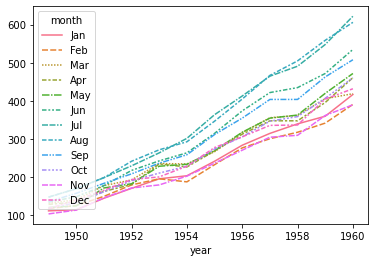

In [35]:
sns.lineplot(data=flights_wide)